In [202]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set(rc={'figure.figsize':(18,10)})
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import StratifiedKFold

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/sample_data/train (1).csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

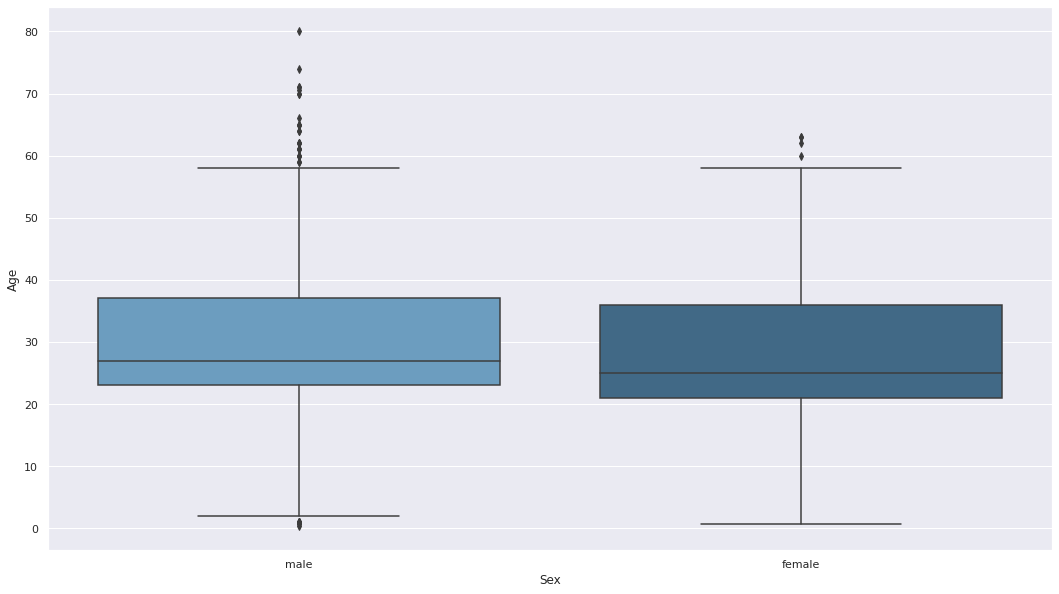

In [105]:
sns.boxplot(data=df,y='Age',x='Sex',palette="Blues_d")

In [93]:
fig = px.bar(x=df.groupby('Pclass')['Age'].mean().to_frame().index,y=df.groupby('Pclass')['Age'].mean(),text=df.groupby('Pclass')['Age'].mean())
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',textfont=dict(
        family="sans serif",
        size=18,
        color="Black"),opacity=0.8)
fig.update_traces(marker_color='Crimson')
fig.update_layout(xaxis=dict(
        title="Pclass",type='category'
    ))
fig.update_layout(yaxis=dict(
        title="Age"
    ))
fig.show()

In [85]:
for index, row in enumerate(df['Age'].isnull()):
  if df.loc[index,['Pclass']].values==1:
    df.loc[index,['Age']]=df.loc[index,['Age']].fillna(38.2)
  elif df.loc[index,['Pclass']].values==2:
    df.loc[index,['Age']]=df.loc[index,['Age']].fillna(30)
  elif df.loc[index,['Pclass']].values==3:
    df.loc[index,['Age']]=df.loc[index,['Age']].fillna(25)

In [86]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Survival vs Sex')

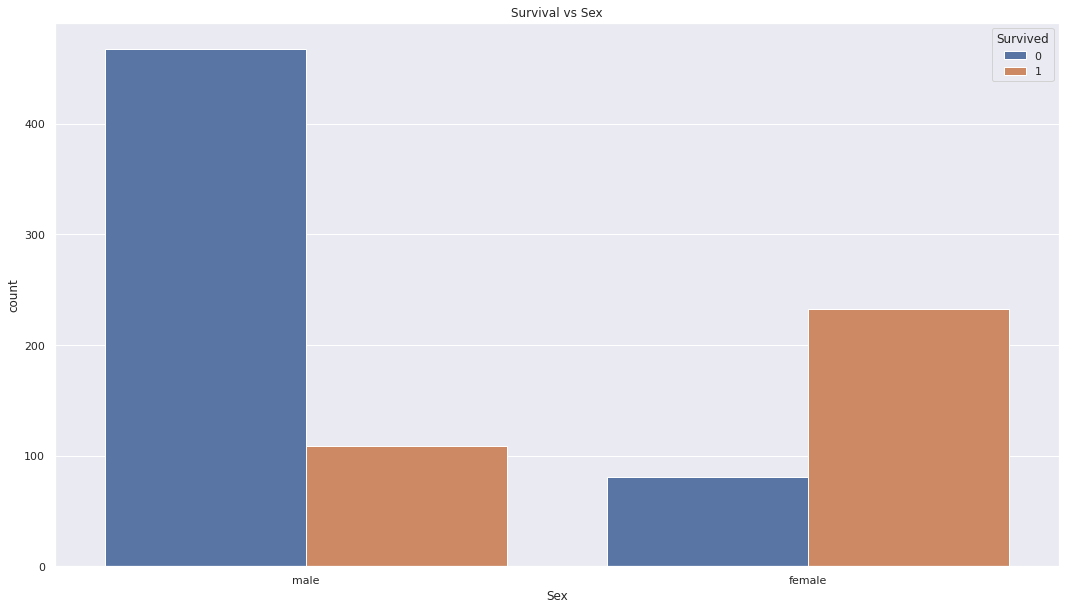

In [106]:
sns.countplot(x= 'Sex', hue='Survived', data=df)
plt.title("Survival vs Sex")

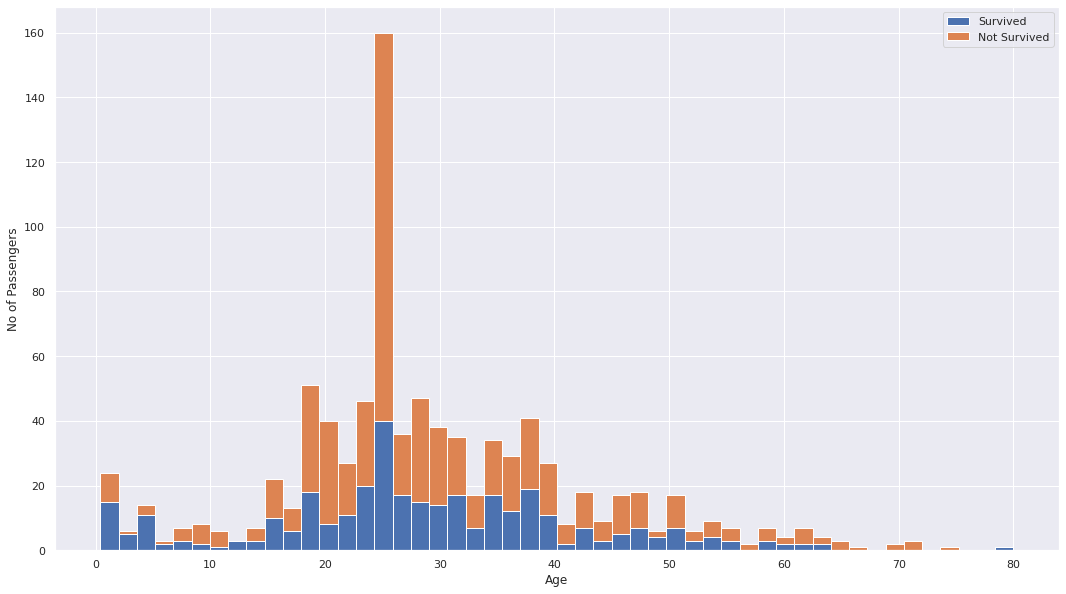

In [109]:
plt.hist([df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], stacked=True,
         bins = 50, label = ['Survived','Not Survived'])
plt.xlabel('Age')
plt.ylabel('No of Passengers')
plt.legend()

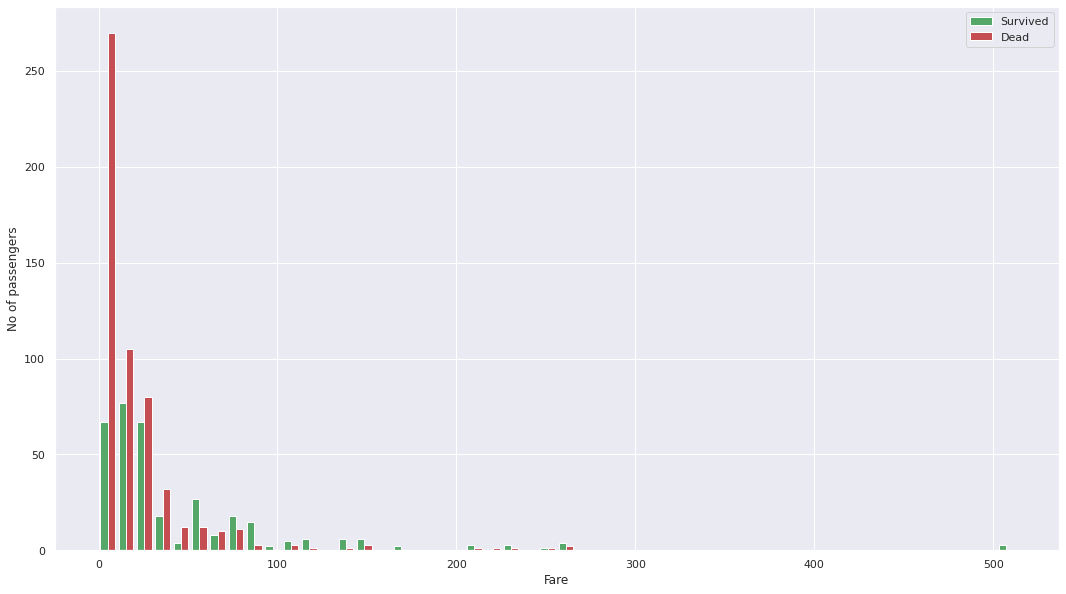

In [112]:
plt.hist([df[df['Survived']==1]['Fare'],
          df[df['Survived']==0]['Fare']], color = ['g','r'],
         bins = 50,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

In [119]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df[df['Survived']==1]['Age'], y=df[df['Survived']==1]['Fare'],
    name='Survived',
    mode='markers',
    marker_color='Blue'
))

fig.add_trace(go.Scatter(
    x=df[df['Survived']==0]['Age'], y=df[df['Survived']==0]['Fare'],
    name='Dead',
    marker_color='Crimson'
))

# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=0.5, marker_size=5)
fig.update_layout(title='Fare vs Survival',
                  yaxis_zeroline=False, xaxis_zeroline=False,xaxis=dict(title='Age'),yaxis=dict(title='Fare'))
fig.show()

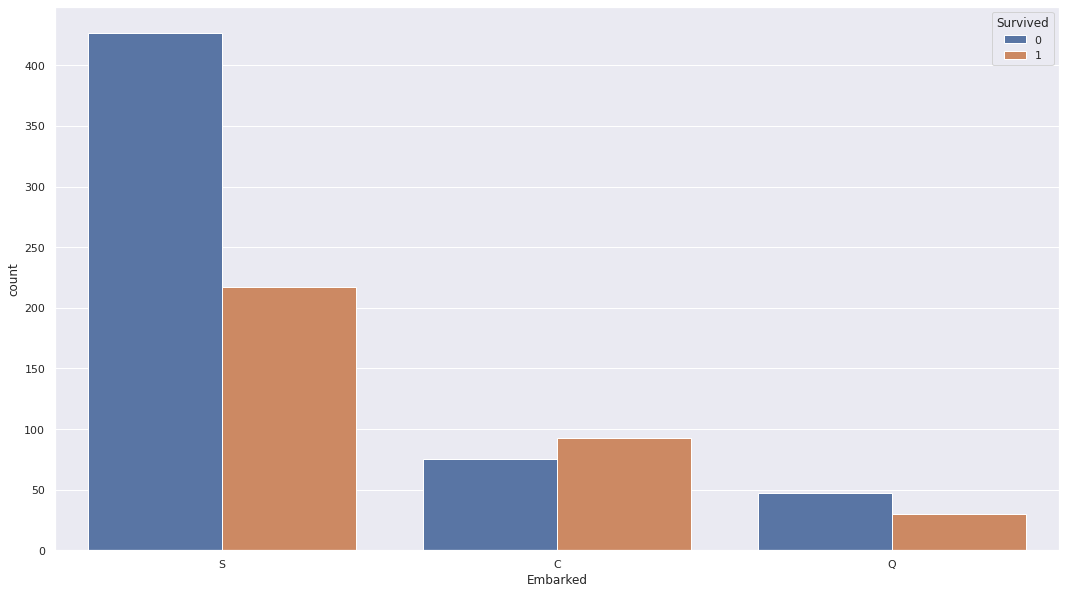

In [120]:
sns.countplot(x= 'Embarked', hue='Survived', data=df)

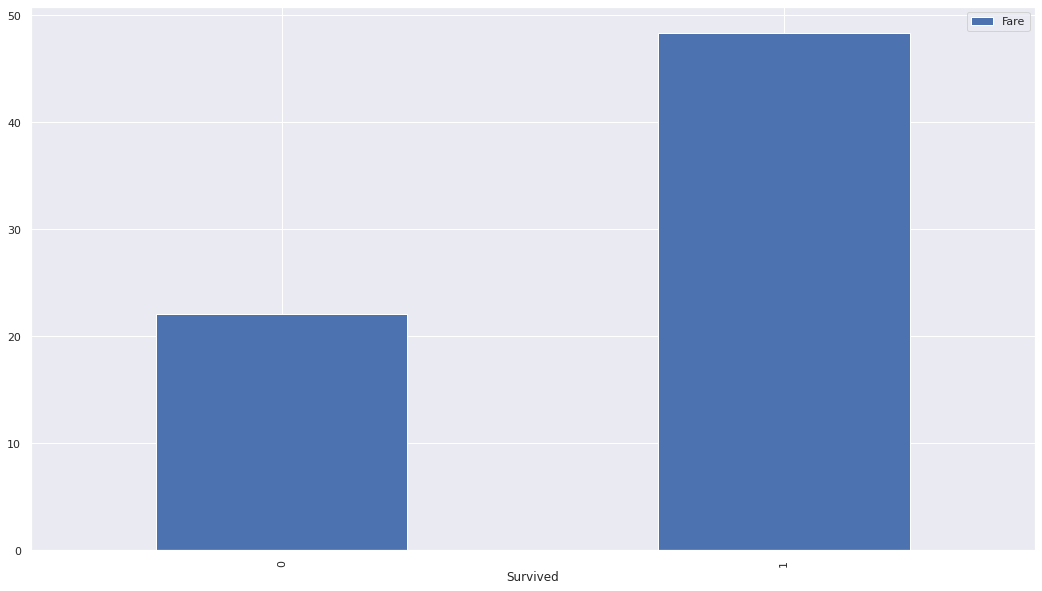

In [123]:
df.groupby('Survived')['Fare'].mean().plot(kind='bar',legend=True)

In [121]:
mapping = {'S':1,
           'C':2,
           'Q':3
          }
malfe={'male':0,
       'female':1}
df['Embarked'] = df.Embarked.map(mapping) 
df['Sex']=df.Sex.map(malfe)

In [127]:
df['fare_s']=df['Fare']
for i in range(len(df['Fare'])):
  if df['Fare'][i]>=30:
    df.fare_s[i]=1
  elif df.iloc[i,6]<30:
    df.fare_s[i]=0

In [154]:
df['Title']=df.Name.str.split(',').str[1].str.split('.').str[0]
df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64

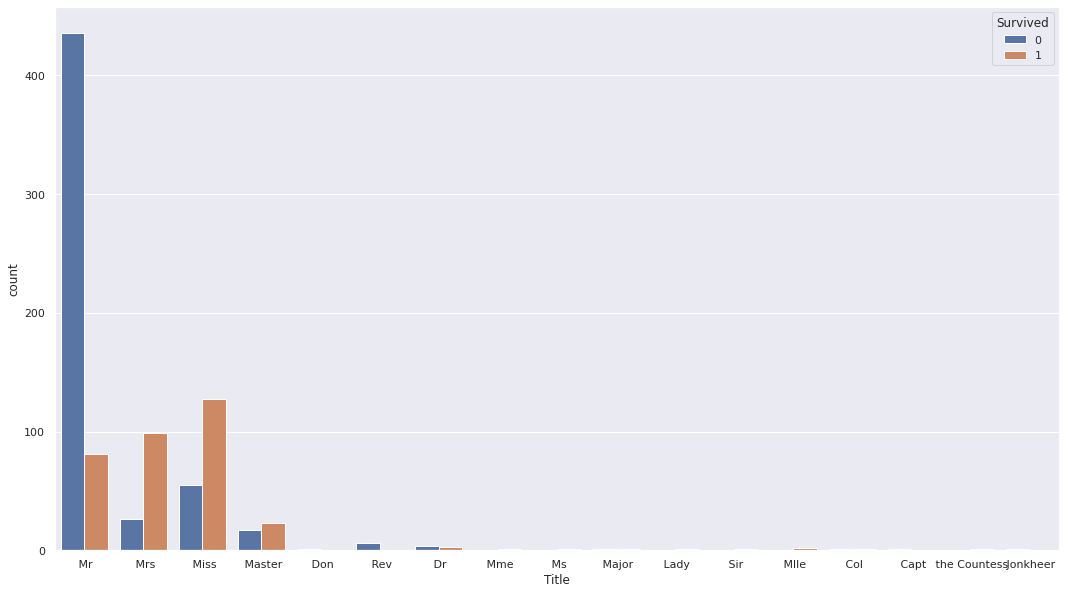

In [155]:
sns.countplot(x= 'Title', hue='Survived', data=df)

In [160]:
le = LabelEncoder()
df['Title']=le.fit_transform(df['Title'])


In [161]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_s,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,0.0,11
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,1.0,12
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,1.0,12
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,0.0,11


In [165]:
df.Embarked.value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [166]:
df.Embarked.fillna(1.0, inplace=True)

In [168]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [169]:
df.Cabin.fillna('Unknown', inplace=True)
df['Cabin']=le.fit_transform(df['Cabin'])

In [184]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = list(filter(lambda x : not x.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [191]:
df['Ticket'] =df['Ticket'].apply(cleanTicket)
df['Ticket']=le.fit_transform(df['Ticket'])

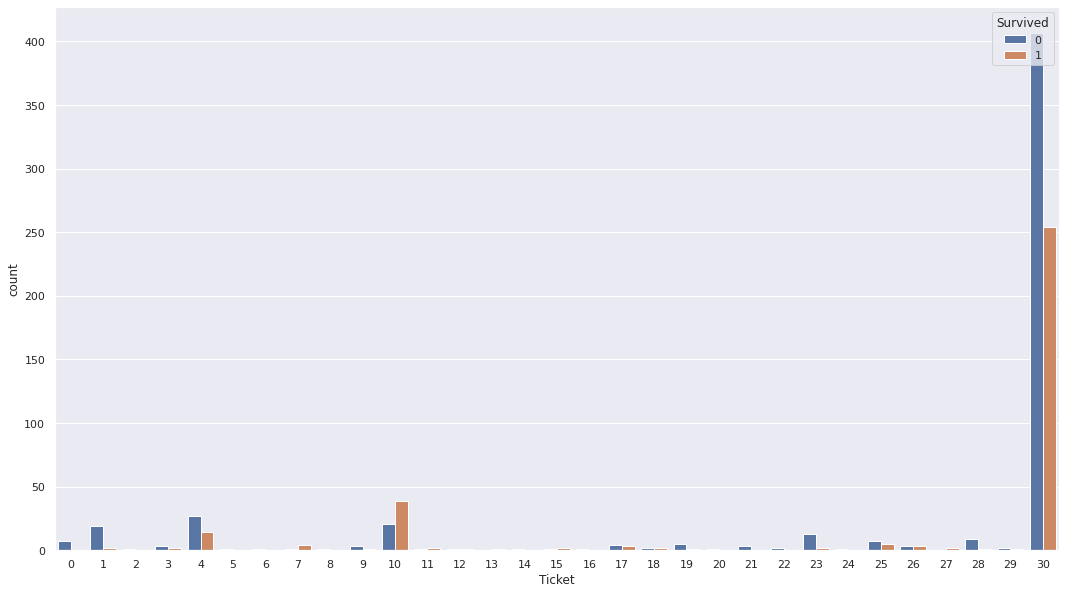

In [194]:
sns.countplot(x= 'Ticket', hue='Survived', data=df)

In [190]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [195]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_s,Title
0,0,3,0,22.0,1,0,1,7.2500,147,1.0,0.0,11
1,1,1,1,38.0,1,0,10,71.2833,81,2.0,1.0,12
2,1,3,1,26.0,0,0,26,7.9250,147,1.0,0.0,8
3,1,1,1,35.0,1,0,30,53.1000,55,1.0,1.0,12
4,0,3,0,35.0,0,0,30,8.0500,147,1.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,30,13.0000,147,1.0,0.0,14
887,1,1,1,19.0,0,0,30,30.0000,30,1.0,1.0,8
888,0,3,1,25.0,1,2,28,23.4500,147,1.0,0.0,8
889,1,1,0,26.0,0,0,30,30.0000,60,2.0,1.0,11


### Modeling

In [198]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,shuffle=True, random_state=42)

In [199]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 11)
(179, 11)
(712,)
(179,)


In [200]:
def cv_score(clf, X, y, scoring='accuracy'):
    score = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(score)

In [ ]:
X=X_train
y=y_train
X_test=X_test
Y_test=y_test


classifier=KNeighborsClassifier(n_neighbors=5)

print('Knn')
print('============================================')
cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
print('Mean of accuracy',np.mean(accuracy),accuracy)
recall = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X, y, cv=cv, scoring='f1')
print('F1', np.mean(f1), f1)
roc = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
print('roc_auc', np.mean(roc), roc)
classifier.fit(X, y)
predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(report)

print('                                         ')
print('MLPClassifier')
print('============================================')

classifier=MLPClassifier(max_iter=500,random_state=5)
cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
accuracy = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
print('Mean of accuracy',np.mean(accuracy),accuracy)
recall = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X, y, cv=cv, scoring='f1_micro')
print('F1', np.mean(f1), f1)
roc = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
print('roc_auc', np.mean(roc), roc)
classifier.fit(X, y)
predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(report)

print('                                         ')
print('LDA')
print('============================================')

classifier=LinearDiscriminantAnalysis()

cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
print('Mean of accuracy',np.mean(accuracy),accuracy)
recall = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X, y, cv=cv, scoring='f1')
print('F1', np.mean(f1), f1)
roc = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
print('roc_auc', np.mean(roc), roc)
classifier.fit(X, y)
predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(report)
print('                                         ')
print('AdaBoostClassifier')
print('============================================')

classifier=AdaBoostClassifier(random_state=5)

cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
print('Mean of accuracy',np.mean(accuracy),accuracy)
recall = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X, y, cv=cv, scoring='f1')
print('F1', np.mean(f1), f1)
roc = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
print('roc_auc', np.mean(roc), roc)
classifier.fit(X, y)
predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(report)




print('                                         ')
print('GradientBoostingClassifier')
print('============================================')

classifier=GradientBoostingClassifier(n_estimators=100,random_state=5)

cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
print('Mean of accuracy',np.mean(accuracy),accuracy)
recall = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X, y, cv=cv, scoring='f1')
print('F1', np.mean(f1), f1)
roc = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
print('roc_auc', np.mean(roc), roc)
classifier.fit(X, y)
predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(report)
print('                                         ')
print('SVC RBF')
print('============================================')

classifier=SVC(kernel='rbf', random_state=5,probability=True)

cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
print('Mean of accuracy',np.mean(accuracy),accuracy)
recall = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X, y, cv=cv, scoring='f1')
print('F1', np.mean(f1), f1)
roc = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
print('roc_auc', np.mean(roc), roc)
classifier.fit(X, y)
predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(report)

print('                                         ')
print('SVC Poly')
print('============================================')

classifier=SVC(kernel = 'poly', random_state=5,probability=True)

cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
print('Mean of accuracy',np.mean(accuracy),accuracy)
recall = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X, y, cv=cv, scoring='f1')
print('F1', np.mean(f1), f1)
roc = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
print('roc_auc', np.mean(roc), roc)
classifier.fit(X, y)

predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(report)
print('                                         ')
print('SVC linear')
print('============================================')

classifier=SVC(kernel = 'linear',random_state=5,probability=True)

cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
print('Mean of accuracy',np.mean(accuracy),accuracy)
recall = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X, y, cv=cv, scoring='f1')
print('F1', np.mean(f1), f1)
roc = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
print('roc_auc', np.mean(roc), roc)
classifier.fit(X, y)
predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(report)

print('                                         ')
print('DecisionTreeClassifier')
print('============================================')

classifier=tree.DecisionTreeClassifier(criterion='gini')

cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
print('Mean of accuracy',np.mean(accuracy),accuracy)
recall = cross_val_score(classifier, X, y, cv=cv, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(classifier, X, y, cv=cv, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(classifier, X, y, cv=cv, scoring='f1')
print('F1', np.mean(f1), f1)
roc = cross_val_score(classifier, X, y, cv=cv, scoring='roc_auc')
print('roc_auc', np.mean(roc), roc)
classifier.fit(X, y)
predicted = classifier.predict(X_test)
report = classification_report(Y_test, predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print(report)

Knn
Mean of accuracy 0.723303457106274 [0.68531469 0.76923077 0.71830986 0.68309859 0.76056338]
Recall 0.5645117845117845 [0.4        0.67272727 0.50909091 0.62962963 0.61111111]
Precision 0.6670373210249341 [0.64705882 0.71153846 0.68292683 0.57627119 0.7173913 ]
F1 0.6062148104712793 [0.49438202 0.69158879 0.58333333 0.60176991 0.66      ]
roc_auc 0.7590992738249792 [0.72386364 0.82489669 0.71243469 0.72885101 0.80545034]
[[84 26]
 [31 38]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       110
           1       0.59      0.55      0.57        69

    accuracy                           0.68       179
   macro avg       0.66      0.66      0.66       179
weighted avg       0.68      0.68      0.68       179

                                         
MLPClassifier
Mean of accuracy 0.7992022062444597 [0.76923077 0.7972028  0.8028169  0.8028169  0.82394366]
Recall 0.6999326599326599 [0.63636364 0.61818182 0.76363636 0.7037037  0.7777

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {
                 'max_depth' : [2,4, 6, 8],
                 'n_estimators': [10,20,30],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 5,10],
                 'min_samples_leaf': [1, 3,5, 10]
                 }
rf = RandomForestClassifier()
cv = StratifiedKFold(y_train, n_folds=5)

gs = GridSearchCV(rf,
                          scoring='accuracy',
                          param_grid=parameter_grid,
                          cv=cross_validation)

gs.fit(train_reduced, y_train)
model = gs
parameters = gs.best_params_
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(parameters))